https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance

Te prediction task is to determine whether a person makes over 50K a year. 

Random Forest classifier to predict whether a person makes over 50K a year.

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### reading data

In [2]:
data = pd.read_csv('income_evaluation.csv')

#### renaming columns

In [3]:
col_names = data.columns.str.replace(' ','')
col_names = col_names.str.replace('-','_')
col_names

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
data.columns = col_names
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### shape of data

In [5]:
data.shape

(32561, 15)

#### null values

In [6]:
data.isna().sum().sum(), data.isnull().sum().sum()

(0, 0)

##### data has no missing values

#### info of data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### categorical cols

In [9]:
for i in col_names:
    if data[i].dtype == 'O':
        print("columns ",i," has",len(data[i].unique()),"unique values")
        print(data[i].unique())
        print()
        

columns  workclass  has 9 unique values
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

columns  education  has 16 unique values
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

columns  marital_status  has 7 unique values
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

columns  occupation  has 15 unique values
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

columns  relationship  has 6 unique values
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

columns

In [10]:
for i in col_names:
    if data[i].dtype == 'int64':
        print(i," has",len(data[i].unique()),"unique values and total ",len(data[i]))
        print()

age  has 73 unique values and total  32561

fnlwgt  has 21648 unique values and total  32561

education_num  has 16 unique values and total  32561

capital_gain  has 119 unique values and total  32561

capital_loss  has 92 unique values and total  32561

hours_per_week  has 94 unique values and total  32561



In [11]:
data['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [12]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

### dropping education_num as it is same as education col

In [13]:
education_mapping = data[['education','education_num']]
education_mapping

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [14]:
education_count = education_mapping.groupby(['education','education_num'])['education'].agg('count').reset_index(name='count')
education_count

,education,education_num,count
0,10th,6,933
1,11th,7,1175
2,12th,8,433
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
7,Assoc-acdm,12,1067
8,Assoc-voc,11,1382
9,Bachelors,13,5355


In [15]:
data.drop('education',axis='columns',inplace=True)
data.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
for i in data.columns:
    if data[i].dtype != 'int64':
        display(data.groupby([i,'income'])['income'].count().unstack().fillna(0))

income,<=50K,>50K
workclass,,
?,1645.0,191.0
Federal-gov,589.0,371.0
Local-gov,1476.0,617.0
Never-worked,7.0,0.0
Private,17733.0,4963.0
Self-emp-inc,494.0,622.0
Self-emp-not-inc,1817.0,724.0
State-gov,945.0,353.0
Without-pay,14.0,0.0


income,<=50K,>50K
marital_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


income,<=50K,>50K
relationship,,
Husband,7275,5918
Not-in-family,7449,856
Other-relative,944,37
Own-child,5001,67
Unmarried,3228,218
Wife,823,745


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


income,<=50K,>50K
native_country,,
?,437.0,146.0
Cambodia,12.0,7.0
Canada,82.0,39.0
China,55.0,20.0
Columbia,57.0,2.0
Cuba,70.0,25.0
Dominican-Republic,68.0,2.0
Ecuador,24.0,4.0
El-Salvador,97.0,9.0


income,<=50K,>50K
income,,
<=50K,24720.0,0.0
>50K,0.0,7841.0


### EDA

sns.pairplot(data=data,hue='income')

##### checking capitla_loss and capital_gain columns

In [17]:
data[['capital_loss','capital_gain']].value_counts()

capital_loss  capital_gain
0             0               28330
              15024             347
              7688              284
              7298              246
1902          0                 202
                              ...  
0             1639                1
              6097                1
2080          0                   1
0             1455                1
2201          0                   1
Length: 210, dtype: int64

In [18]:
data['capital_gain'].value_counts()/len(data['capital_gain'])*100

0        91.671017
15024     1.065692
7688      0.872209
7298      0.755505
99999     0.488314
           ...    
1111      0.003071
2538      0.003071
22040     0.003071
4931      0.003071
5060      0.003071
Name: capital_gain, Length: 119, dtype: float64

In [19]:
data['capital_loss'].value_counts()/len(data['capital_loss'])*100

0       95.334910
1902     0.620374
1977     0.515955
1887     0.488314
1848     0.156629
          ...    
2080     0.003071
1539     0.003071
1844     0.003071
2489     0.003071
1411     0.003071
Name: capital_loss, Length: 92, dtype: float64

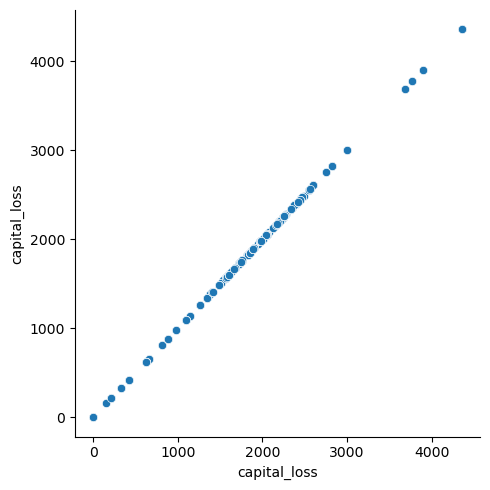

In [20]:
sns.relplot(data=data,x='capital_loss',y='capital_loss')

##### more than 91% values in capital_gain and capital_loss is 0. so we can drop both columns

In [21]:
data.drop(columns=['capital_loss','capital_gain'],inplace=True)
data.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


[Text(0.5, 1.0, 'Distribution of fnlwgt variable')]

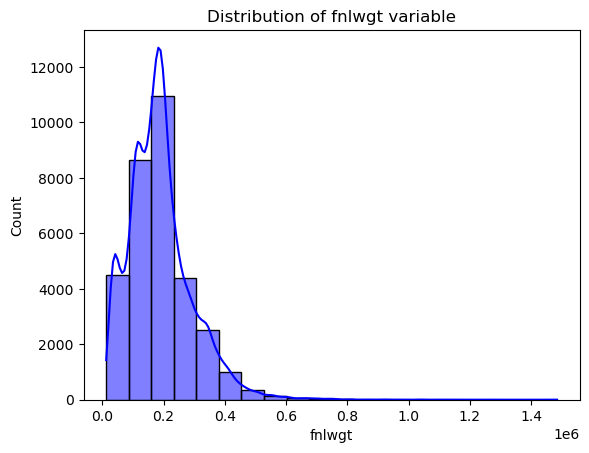

In [22]:
sns.histplot( x = data['fnlwgt'],bins=20,color='blue',kde=True).set(title='Distribution of fnlwgt variable')

<AxesSubplot:ylabel='fnlwgt'>

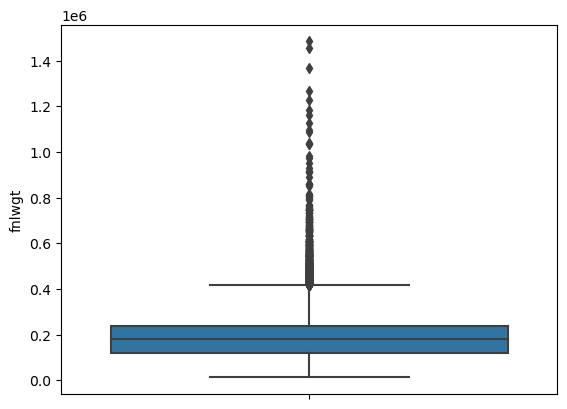

In [23]:
sns.boxplot(data=data,y='fnlwgt')

##### NOTE : Need to treat fnlwgt column

[Text(0.5, 1.0, 'Distribution of age variable')]

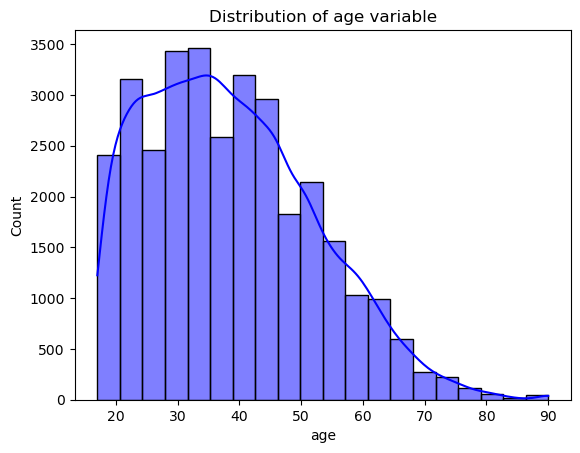

In [24]:
sns.histplot( x = data['age'],bins=20,color='blue',kde=True).set(title='Distribution of age variable')

<AxesSubplot:xlabel='age'>

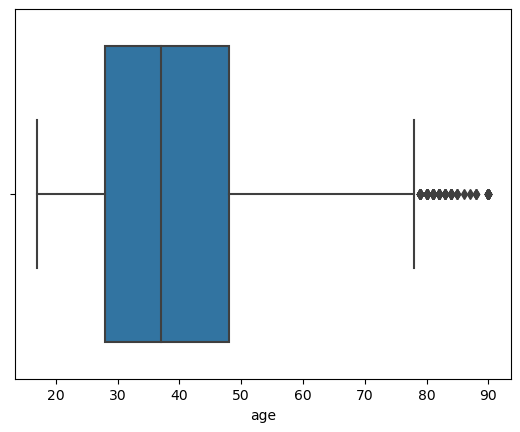

In [25]:
sns.boxplot(data=data,x='age')

[Text(0.5, 1.0, 'Distribution of hours_per_week variable')]

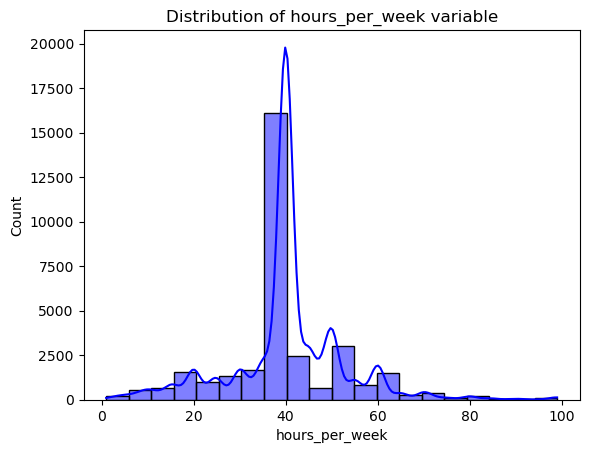

In [26]:
sns.histplot( x = data['hours_per_week'],bins=20,color='blue',kde=True).set(title='Distribution of hours_per_week variable')

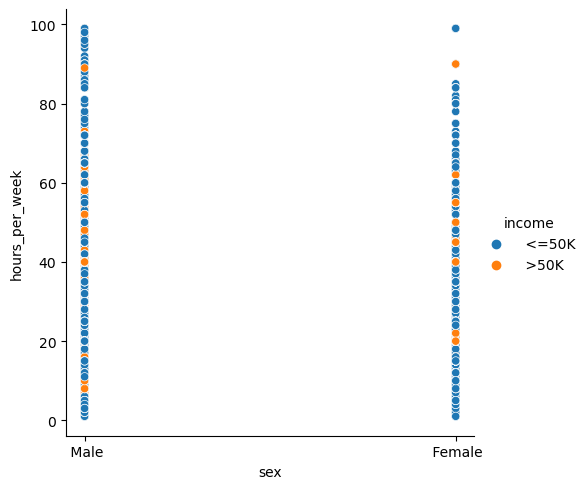

In [27]:
sns.relplot(data=data,y='hours_per_week',x='sex',hue='income')

### correlation

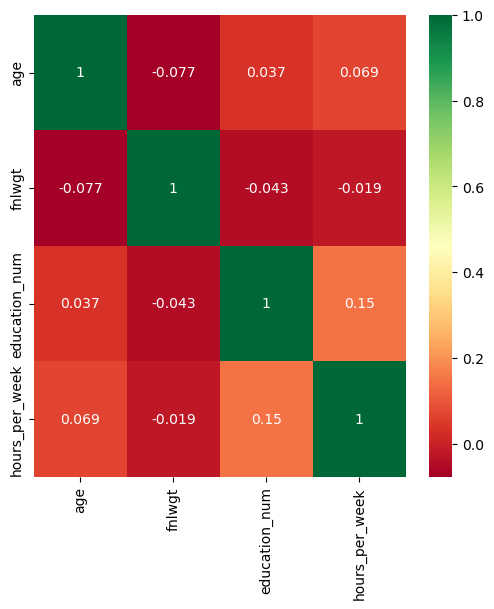

In [28]:
plt.figure(figsize=(6,6))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

##### We can see that there is no strong correlation between variables.

### Splitting into dependent and independent columns

In [29]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((32561, 11), (32561,))

In [30]:
X.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


### Encoding columns

In [31]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
categorical_cols = []
numerical_cols = []

#### numerical_cols

In [33]:
for i in X.columns:
    if X[i].dtype == 'int64':
        numerical_cols.append(i)

In [34]:
numerical_cols

['age', 'fnlwgt', 'education_num', 'hours_per_week']

#### categorical cols

In [35]:
for i in X.columns:
    if X[i].dtype == 'O':
        categorical_cols.append(i)

In [36]:
categorical_cols

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

#### Encoding categorical data through pd.get dummies before splitting the data

In [37]:
X_trf = pd.get_dummies(X,drop_first=True)
X_trf.head()

,age,fnlwgt,education_num,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_trf.shape

(32561, 83)

In [39]:
y_trf = pd.get_dummies(y,drop_first=True)
y_trf

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Cross val score

In [41]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,StratifiedShuffleSplit

In [42]:
sss = StratifiedShuffleSplit()

In [43]:
kf = StratifiedKFold()

In [44]:
np.mean(cross_val_score(RandomForestClassifier(),X_trf.values,y_trf.values,cv=kf,n_jobs=-1))

0.828875050881039

### Splitting data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_trf, y_trf, test_size=0.3,stratify=y)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 83), (9769, 83), (22792, 1), (9769, 1))

#### Vanilla random Forest and OOB score

In [48]:
rfc = RandomForestClassifier(oob_score=True)

In [49]:
rfc.fit(X_trf, y_trf.values.ravel())

RandomForestClassifier(oob_score=True)

In [50]:
rfc.oob_score_

0.8253124904026289

#### Vanilla random forest

In [51]:
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(oob_score=True)

In [52]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [53]:

print("Training accuracy",accuracy_score(y_test.values.ravel(),y_pred))

print("Testing accuracy",accuracy_score(y_test.values.ravel(),y_pred))

Training accuracy 0.826696693622684
Testing accuracy 0.826696693622684


In [54]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Find important features with Random Forest model 

In [55]:
importance_vals = rfc.feature_importances_
indices = np.argsort(importance_vals)[::-1]
indices

array([ 1,  0,  2,  3, 13, 15, 21, 27, 41, 32, 34,  7, 35, 36,  9, 25,  8,
       29, 80, 40, 20,  5, 18, 30, 38, 10, 31, 22,  4, 24, 23, 28, 37, 33,
       16, 17, 67, 52, 14, 43, 71, 50, 63, 46, 60, 39, 72, 76, 44, 65, 74,
       64, 51, 61, 53, 42, 12, 81, 49, 77, 45, 55, 26, 73, 62, 59, 48, 68,
       58, 47, 82, 54, 70, 66, 75, 79, 78, 11, 69, 57, 19,  6, 56],
      dtype=int64)

In [56]:
importance_vals

array([1.80878380e-01, 1.96046910e-01, 1.33901465e-01, 1.02281988e-01,
       4.93844424e-03, 6.24039272e-03, 7.78803628e-06, 1.12585234e-02,
       8.07624670e-03, 9.04578170e-03, 5.16507030e-03, 4.73166551e-05,
       3.42603767e-04, 8.43649760e-02, 1.15157454e-03, 3.48018439e-02,
       2.51883823e-03, 2.50457042e-03, 6.19130100e-03, 2.51985124e-05,
       7.15370593e-03, 2.41846006e-02, 5.03985312e-03, 3.96562415e-03,
       4.87955339e-03, 8.49168773e-03, 2.36980644e-04, 1.82450988e-02,
       3.59375159e-03, 7.87809715e-03, 5.31094193e-03, 5.13594754e-03,
       1.66907732e-02, 2.90222862e-03, 1.45108894e-02, 1.07453339e-02,
       9.70717303e-03, 3.25574416e-03, 5.30135398e-03, 7.70427619e-04,
       7.64727899e-03, 1.80713047e-02, 4.14231107e-04, 1.14198315e-03,
       7.33993750e-04, 2.79818101e-04, 7.93475444e-04, 1.46913579e-04,
       1.74302970e-04, 2.97807757e-04, 1.06772309e-03, 4.53774284e-04,
       1.39921533e-03, 4.19103440e-04, 1.14044975e-04, 2.55122594e-04,
      

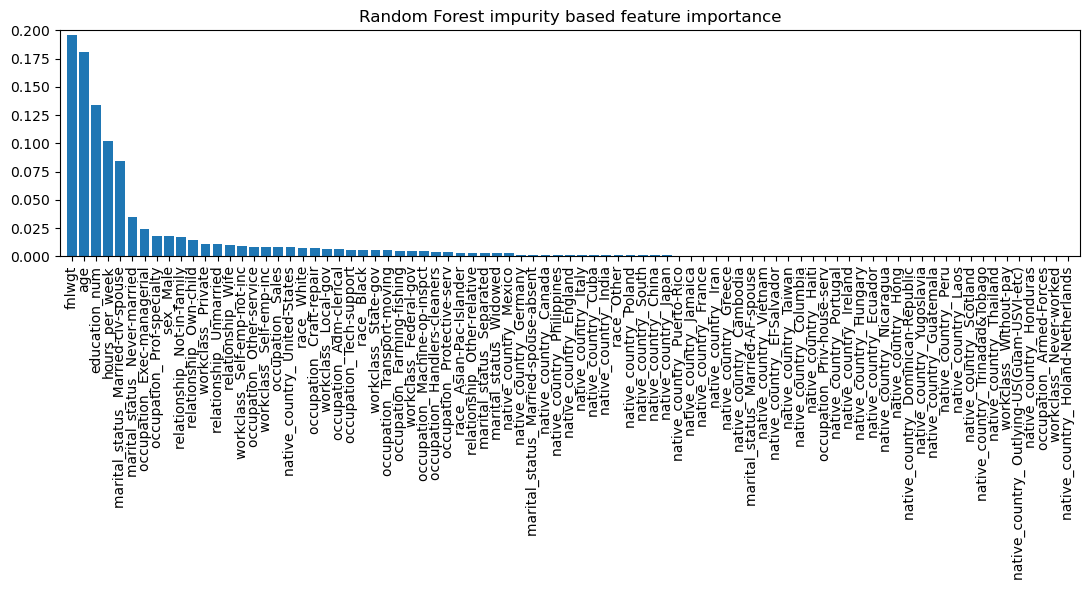

In [57]:
plt.figure(figsize=(11,6))
plt.title("Random Forest impurity based feature importance")
plt.bar(range(X_train.shape[1]), importance_vals[indices])

plt.xticks(range(X_train.shape[1]), X_train.columns[0:][indices],rotation =90)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.show()

### Feature importance with sklearn

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [60]:
result = permutation_importance(
    estimator=rfc,
    X=X_test,
    y=y_test.values.ravel(),
    scoring='accuracy',
    n_repeats=5,
    n_jobs=-1,
    random_state=0
)

In [61]:
result.importances

array([[ 0.02129184,  0.02088238,  0.01740199,  0.0202682 ,  0.02047292],
       [ 0.00133074,  0.00030709,  0.00378749, -0.00071655,  0.00092128],
       [ 0.03070939,  0.02999283,  0.02845737,  0.0332685 ,  0.03060702],
       [ 0.01228375,  0.01351213,  0.01361449,  0.00941755,  0.01443341],
       [ 0.0014331 ,  0.00040946,  0.00092128,  0.0014331 ,  0.00061419],
       [-0.00092128, -0.00092128,  0.00020473, -0.00102365, -0.00051182],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00112601,  0.00399222,  0.        , -0.00061419, -0.00061419],
       [ 0.0017402 ,  0.00153547,  0.00092128,  0.00010236,  0.00163783],
       [ 0.00194493,  0.00102365,  0.00163783,  0.00235439,  0.00112601],
       [ 0.        ,  0.00051182,  0.00020473,  0.00040946, -0.00010236],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00010236,  0.        ,  0.        ],
       [ 0.02774081,  0.02477224,  0.0

In [62]:
indices = np.argsort(result.importances_mean)[::-1]

In [63]:
indices

array([ 2, 13,  0,  3, 34, 21, 15, 25, 27,  9, 22,  8,  1,  4,  7, 32, 30,
       23, 33, 40, 14, 10, 24, 63, 17, 49, 45, 26, 12, 52, 76, 47, 79, 44,
       39, 19, 42, 11,  6, 82, 56, 73, 68, 66, 65, 62, 72, 59, 58, 57, 70,
       55, 69, 54, 75, 46, 51, 48, 77, 74, 64, 61, 60, 50, 16, 67, 71, 37,
       53, 78, 81, 38, 43, 80, 28, 35, 29,  5, 41, 20, 31, 36, 18],
      dtype=int64)

In [64]:
feature_imp_df = pd.DataFrame(result.importances_mean)
feature_imp_df

,0
0,0.020063
1,0.001126
2,0.030607
3,0.012652
4,0.000962
...,...
78,-0.000102
79,0.000020
80,-0.000287
81,-0.000102


In [65]:
feature_imp_df['feature_name'] = X_train.columns

In [66]:
feature_imp_df.sort_values(by=0,ascending=False,inplace=True)
feature_imp_df

,0,feature_name
2,0.030607,education_num
13,0.025653,marital_status_ Married-civ-spouse
0,0.020063,age
3,0.012652,hours_per_week
34,0.003624,relationship_ Own-child
...,...,...
41,-0.000717,sex_ Male
20,-0.000778,occupation_ Craft-repair
31,-0.001106,occupation_ Transport-moving
36,-0.001126,relationship_ Wife


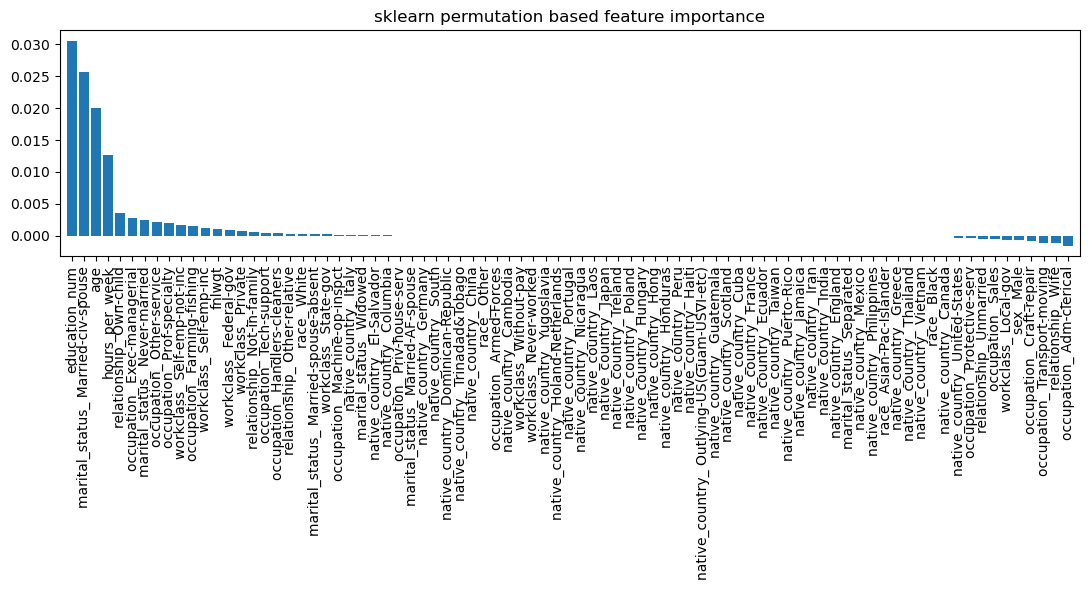

In [67]:
plt.figure(figsize=(11,6))
plt.title("sklearn permutation based feature importance")
plt.bar(range(X_train.shape[1]), result.importances_mean[indices])

plt.xticks(range(X_train.shape[1]), X_train.columns[0:][indices],rotation =90)
plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='0', ylabel='feature_name'>

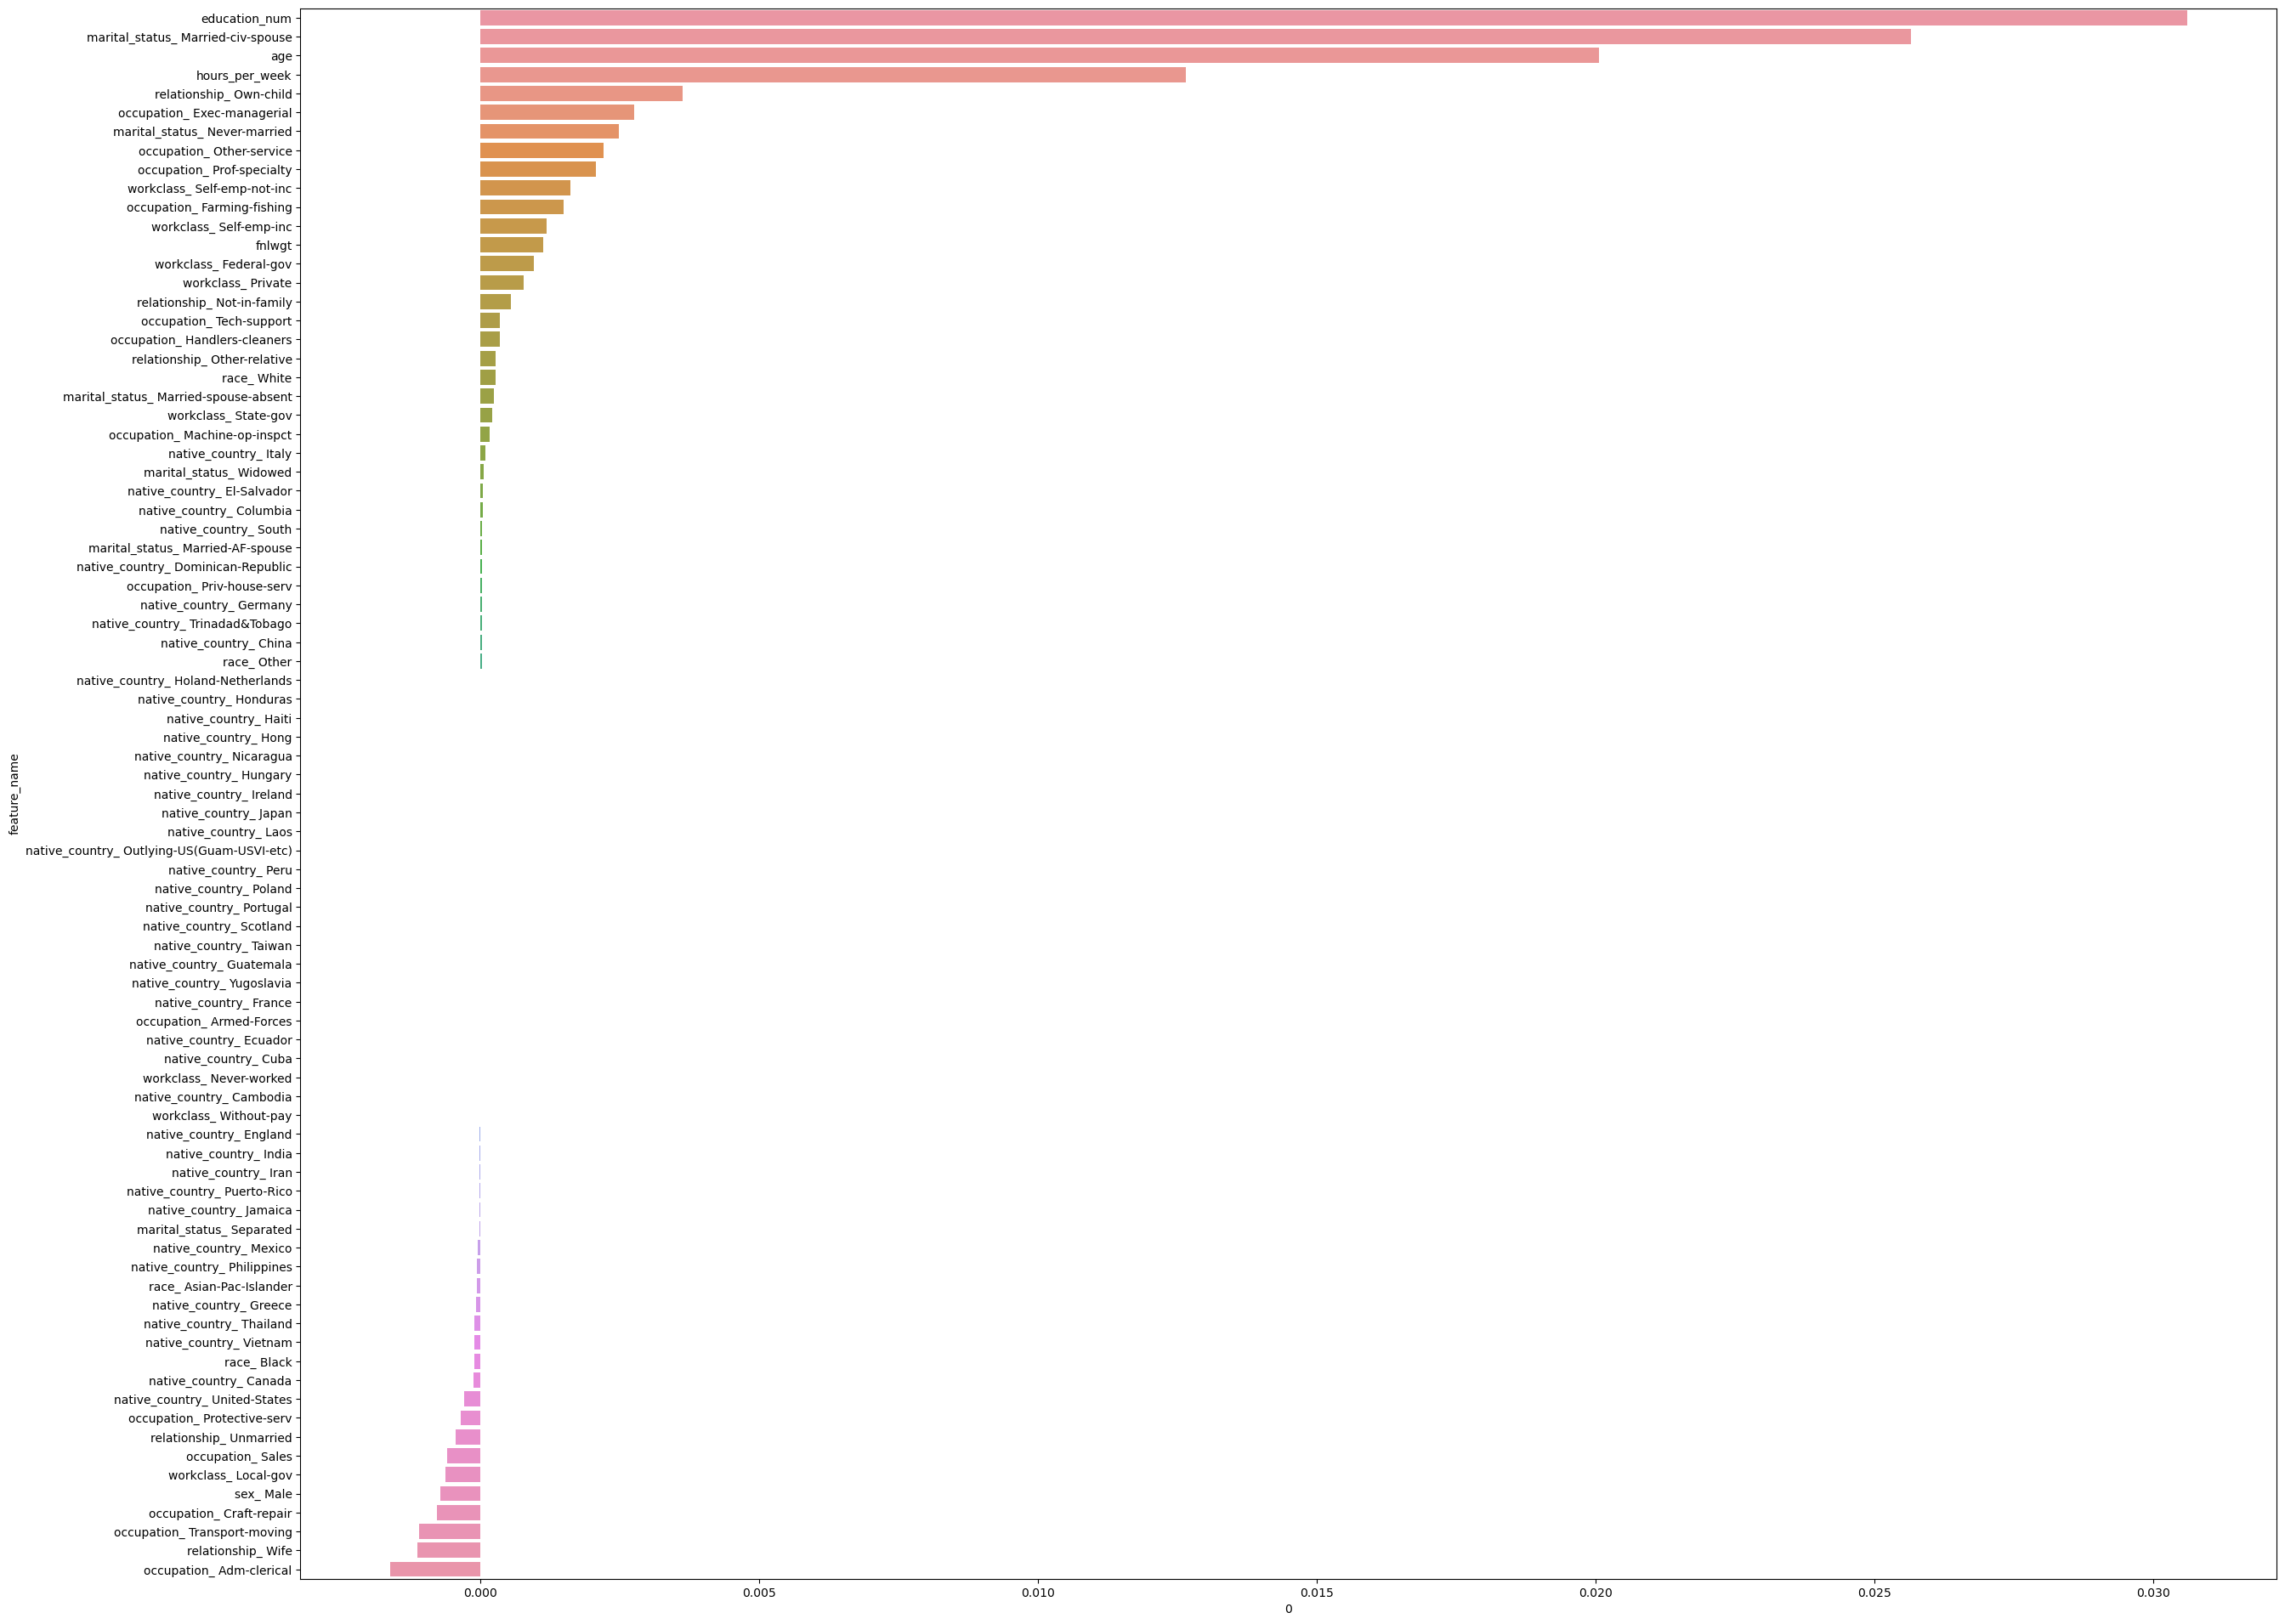

In [68]:
plt.subplots(figsize=(30, 24))
sns.barplot(data=feature_imp_df,x=0,y='feature_name')

### Hyperparameter tuning

In [69]:
import time

In [70]:
rfc = RandomForestClassifier(max_depth = 12,
                             max_samples = 0.8,
                             max_features='auto',
                             min_samples_leaf= 10,
                             min_samples_split= 20,
                             n_estimators= 160,
                             random_state=0)

In [71]:
rfc.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=12, max_samples=0.8, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=160, random_state=0)

In [72]:
rfc.feature_importances_

array([9.13488341e-02, 1.14379510e-02, 1.84677635e-01, 6.39157471e-02,
       1.60353158e-03, 1.35523914e-03, 0.00000000e+00, 3.32775943e-03,
       8.74210254e-03, 4.22830258e-03, 7.57527841e-04, 0.00000000e+00,
       2.51356898e-05, 2.51983570e-01, 6.71353891e-04, 8.14946946e-02,
       2.59805797e-03, 1.58705259e-03, 2.93890237e-03, 0.00000000e+00,
       4.69855275e-03, 4.69741502e-02, 6.54613668e-03, 5.40773235e-03,
       6.62732720e-03, 1.60710678e-02, 5.03384897e-05, 3.53819482e-02,
       1.01314145e-03, 3.01215528e-03, 2.36817693e-03, 2.91958686e-03,
       3.73929822e-02, 3.21852946e-03, 3.06207125e-02, 1.90947060e-02,
       1.89204260e-02, 7.11278762e-04, 1.73791820e-03, 1.91980855e-04,
       3.82983663e-03, 3.48575568e-02, 0.00000000e+00, 4.21559485e-05,
       8.42003810e-06, 2.76673585e-05, 1.00306523e-05, 0.00000000e+00,
       0.00000000e+00, 1.54296439e-05, 5.03632553e-06, 0.00000000e+00,
       2.60334874e-05, 0.00000000e+00, 7.91545607e-06, 0.00000000e+00,
      

In [73]:
rfc.feature_names_in_

array(['age', 'fnlwgt', 'education_num', 'hours_per_week',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 're

In [74]:
y_pred = rfc.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.8339645818405159

In [76]:
accuracy_score(y_train,rfc.predict(X_train))

0.8367848367848368

##### very good accuracy score for training and testing

In [77]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[7037,  380],
       [1242, 1110]], dtype=int64)

<AxesSubplot:>

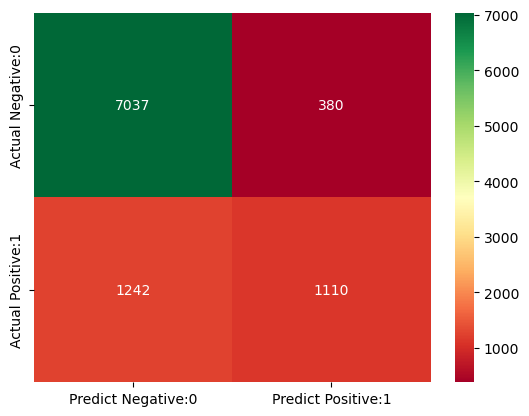

In [78]:
cm = pd.DataFrame(data=cm,columns=['Predict Negative:0','Predict Positive:1'],
                 index=['Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm, annot=True, cmap ='RdYlGn',fmt='d')

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7417
           1       0.74      0.47      0.58      2352

    accuracy                           0.83      9769
   macro avg       0.80      0.71      0.74      9769
weighted avg       0.82      0.83      0.82      9769

